# 파이썬과 함수 최적화만 사용하여 로지스틱 회귀 만들기

- 이 노트북 파일에서는 머신러닝, 딥러닝에 대한 기본 지식이 없이 심지어 머신러닝, 딥러닝 라이브러리를 사용하지 않고 로지스틱 회귀를 구현해 봅니다.

- 필요한 지식은 점과 회귀선의 차이를 줄인다는 것과 목적함수 식을 이해하는 것입니다.

- 또 사용하는 라이브러리는 구성된 목적함수를 최소화 하기 위한 `scipy.optimize.minimize`함수입니다.

- 중요한것은 최적화 이론 깊은 곳에서 일어나는 세부사항을 전혀 몰라도 괜찮다는 것입니다. 단지 사용하는 `minimize`함수가 주어진 함수의 함수값을 최소로 만들어 준다는 사실만 기억하세요.

- 그럼 시작 해보겠습니다!


### 모듈 임포트

- 파이썬 문법 시간에 배운대로 파이썬을 제대로 활용할려면 최소한의 외부 라이브러리가 필요합니다.

- 여기서는 그림을 그리기 위해 `matplotlib`와 함수를 최소화하기 위한 `minimize`함수를 임포트 하겠습니다.

- 데이터 생성을 위해  `numpy` 모듈을 사용하나 모델을 구현하는데 사용하지 않으므로 구체적인 내용을 몰라도 상관없습니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

- 분류 학습에 사용할 데이터를 생성합니다.

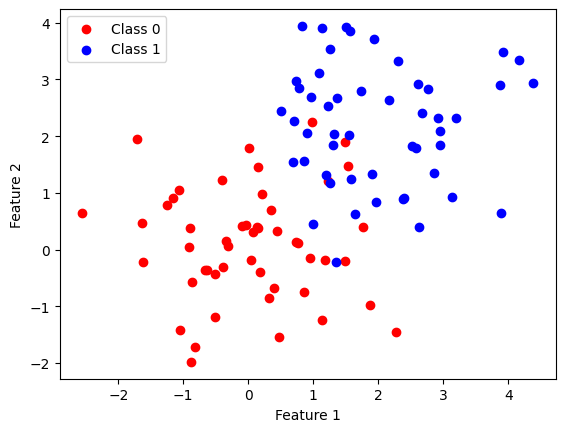

In [ ]:
# Step 1: Generate some 2D data points
np.random.seed(0)
X1 = np.random.normal(0, 1, (50, 2))  # Class 1
X2 = np.random.normal(2, 1, (50, 2))  # Class 2

X = np.vstack((X1, X2)) # (100,2)
y = np.hstack((np.zeros(50), np.ones(50)))  # Class labels

plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 0')
plt.scatter(X2[:, 0], X2[:, 1], color='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()


D = {'data':X, 'target':y}


- 위 데이터에서 직선을 사용하여 빨간점과 파란점을 구분하고 싶습니다.

- 모델은 $ z = w_2 x_2 + w_1 x_1 + w_0 $ 될 것이며 여기서 $x_1$, $x_2$는 점의 $x$, $y$ 좌표값이고 $z$는 모델의 출력인데 범위가 제한되지 않은 임의의 숫자가 될 것입니다.

- 따라서 아래와 같은 로지스틱 시그모이드 함수를 이용해 모델의 출력을 0~1사이로 제한합니다.

$$
\sigma(z) = \frac{1}{1+\exp({-z})}
$$

- 다음처럼 `Loss`클래스를 정의 합니다. 손실함수를 일반적인 `def func()`형태로 정의 하지 않고 클래스 형태로 정의하는 이유는 이 함수의 값을 구하기 위해서는 `X`와 `y`가 필요하기 때문입니다. 즉, 데이터가 필요합니다.

- 이 데이터를 클래스의 내부 자료로 가지고 있으면 좀 더 명확하게 손실 함수 코드를 작성할 수 있습니다.

- 손실함수 값은 다음처럼 계산됩니다.

$$
BCE = \frac{1}{N}  \sum_{i=1}^{N} y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)
$$

- 위 식에서 $\hat{y}_i$는 다음처럼 모델의 출력입니다.

$$
\hat{y}_i = \sigma(w_2 x_2 + w_1 x_1 + w_0)
$$

- 위 식으로 부터 이제는 최적화 시켜야할 변수(parameter)가 세 개라는 것을 알 수 있습니다.

- `__call__`함수를 정의해서 이 클래스로 부터 만들어진 객체가 callable하게 만들어 `minimize`함수가 마치 객체를 함수처럼 인식하도록 해야 합니다.


In [ ]:
# Step 2: Define the logistic regression model
class Loss:
    def __init__(self, D):
        # D로 부터 내부 변수로 X, y, N을 초기화
        self.X = D['data']
        self.y = D['target']
        self.N = len(self.X)

    def __call__(self, w):
        """
        w: 매개변수 w0, w1가 포함된 리스트
        """
        loss = self.forward(w)
        return loss

    def forward(self, w):
        # 모든 점에서 발생하는 에러를 저장할 리스트를 만듭니다.
        errors = []

        ########################################################################
        # WRITE YOUR CODE
        # 모든 점을 순회하면서
        for x, y in zip(self.X, self.y):
            # 모델로 예측값을 구합니다.


            # 예측값을 이용하여 손실값(BCE)을 계산


        # for 문을 마치고 나면 errors에 모든 에러값이 들어 있으므로
        # 이를 모두 더하고 N로 나눕니다.
        return None
        ########################################################################



In [ ]:
# 손실 함수 객체를 만들고
loss = Loss(D)

- `loss`객체에서 적당한 값을 대입하고 함수값이 잘 구해지는지 테스트해보겠습니다.

In [ ]:
loss([3, 2, 0])

1.6107173165033641

### 최적화

- 이제 적당히 초기 `w`값을 잡고 `minimize`함수를 실행하면 됩니다.

In [ ]:
# Step 3: Train the model using optimization

initial_w = [0, 0, 0]
result = None
optimal_w = None

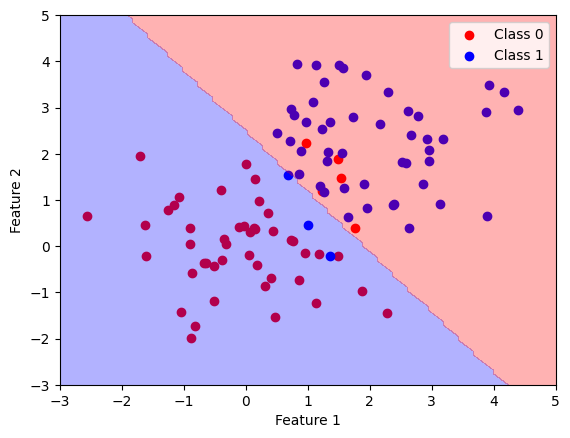

In [ ]:
# Step 4: Predict and visualize
def predict(X, w):
    z = np.dot(X, w)
    return (1 / (1 + np.exp(-z))) >= 0.5

# Generate a grid of points to plot decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 5, 100), np.linspace(-3, 5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_with_bias = np.hstack((np.ones((grid.shape[0], 1)), grid))

preds = predict(grid_with_bias, optimal_w)
preds = preds.reshape(xx.shape)

# Plot data points and decision boundary
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 0')
plt.scatter(X2[:, 0], X2[:, 1], color='blue', label='Class 1')
plt.contourf(xx, yy, preds, alpha=0.3, levels=[0, 0.5, 1], colors=['blue', 'red'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()